## Logistic Regression

### Use for binary classification

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('candy-data.csv')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [6]:
print(df.duplicated().sum())

0


In [7]:
# Check for null values
print(df.isnull().sum())

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64


In [8]:
df.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [10]:
df.count()

competitorname      85
chocolate           85
fruity              85
caramel             85
peanutyalmondy      85
nougat              85
crispedricewafer    85
hard                85
bar                 85
pluribus            85
sugarpercent        85
pricepercent        85
winpercent          85
dtype: int64

In [12]:
df.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [13]:
df.shape

(85, 13)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [15]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [24]:
df = df.drop(columns=['competitorname'])

In [25]:
df.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [ ]:
# X_train = df.drop(columns=['chocolate'])
# y_train = df['chocolate']

In [26]:
from sklearn.model_selection import train_test_split
trainingSet, testSet  = train_test_split(df, test_size=0.2)

In [27]:
train_df=trainingSet
test_df=testSet

In [37]:
train_df

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
33,1,0,0,0,0,0,0,0,1,0.825,0.651,66.574585
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
40,1,0,0,1,0,0,0,1,0,0.313,0.918,54.526451
75,1,0,0,0,0,0,0,0,0,0.313,0.511,43.068897
77,1,0,0,0,0,0,0,1,0,0.465,0.325,49.653503
...,...,...,...,...,...,...,...,...,...,...,...,...
62,1,0,0,0,0,0,0,0,1,0.267,0.976,37.887188
44,0,1,0,0,0,0,0,0,1,0.197,0.976,22.445341
18,0,1,0,0,0,0,0,0,1,0.465,0.465,57.119740
66,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998


In [30]:
x_train = trainingSet.drop(columns=['chocolate'])
y_train = trainingSet['chocolate']
x_test = testSet.drop(columns=['chocolate'])
y_test = testSet['chocolate']

## Data Exploration

In [31]:
y_train.value_counts()

chocolate
0    38
1    30
Name: count, dtype: int64

In [35]:

import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\user\AppData\Local\Temp\ipykernel_21700\396018046.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= "chocolate", data=train_df, palette='Blues_d')


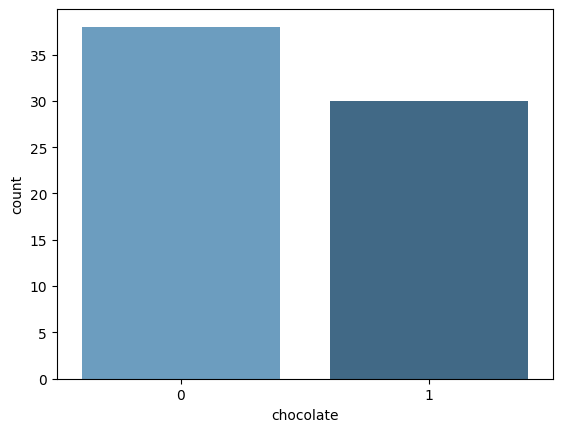

<Figure size 640x480 with 0 Axes>

In [38]:
sns.countplot(x= "chocolate", data=train_df, palette='Blues_d')
plt.show()
plt.savefig('count_plot.png')

In [39]:
count_no_choc = len(train_df[train_df.chocolate == 0])
count_choc = len(train_df[train_df.chocolate == 1])
pct_of_no_choc = count_no_choc/(count_no_choc+count_choc)
print("percentage of no chocolate candies is", pct_of_no_choc*100)
pct_of_choc = count_choc/(count_no_choc+count_choc)
print("percentage of chocolate candies is", pct_of_choc*100)

percentage of no chocolate candies is 55.88235294117647
percentage of chocolate candies is 44.11764705882353


### Model Developement and Prediction

In [40]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [41]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[10,  0],
       [ 1,  6]])

### Visualize CFM using a heatmap

In [42]:
import numpy as np


In [ ]:
# class_name=[0,1]
# flg, ax =plt

In [43]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Precision: ",metrics.precision_score(y_test, y_pred))
print("Recall: ",metrics.recall_score(y_test,y_pred))

Accuracy:  0.9411764705882353
Precision:  1.0
Recall:  0.8571428571428571
